In [172]:
import pandas as pd
import glob
import os
import copy
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def fixDataLength(path):
    '''
    gets rid of the weird length stuff
    path (string) : filepath to the .log file for a participant
    '''     
    x = open(path)
    s = x.read().replace(',,,', ',NaN,NaN,')
    x.close()

    # Now open the file in write mode and write the string with replaced

    x=open(path,'w')
    x.write(s)
    x.close()
    

In [228]:
def getAccAndRT(df):
    '''
    returns [array]: [reaction time, accuracy] for dataframe df
    df needs to have ['respTime'] and ['accuracy'] columns, and a name
    '''
    accCount = df['accuracy'].astype(int).sum()

    accPerc = accCount / len(df)
    RTdf = df.loc[df['accuracy'] == 1] #remove mistake trials for RT calculation
    # RTdf = RTdf.loc[RTdf['respTime'] > 300 & RTdf['respTime'] < 2000] #trim the outliers
    RTdf = RTdf.loc[RTdf['respTime'].between(300,2000)]
    RT = RTdf['respTime'].astype(float).mean()
    
    print(df.name + ' AccPerc is ' + str(accPerc))
    print(df.name + ' avg resp time: ' + str(RT))
    
    return [accPerc, RT]



In [238]:
#this is a horrible way to do this and fix it later

def getMergedAccAndRT(df):
    '''
    returns [array]: [reaction time, accuracy] for dataframe df
    df needs to have ['respTime_x'] and ['accuracy_x'] columns, and a name
    '''
    accCount = df['accuracy_x'].astype(int).sum()

    accPerc = accCount / len(df)
    RTdf = df.loc[df['accuracy_x'] == 1] #remove mistake trials for RT calculation
    RTdf = RTdf.loc[RTdf['respTime_x'].between(300,2000)]

    RT = RTdf['respTime_x'].astype(float).mean()
    
    print(df.name + ' AccPerc is ' + str(accPerc))
    print(df.name + ' avg resp time: ' + str(RT))
    
    return [accPerc, RT]

In [200]:

#global script variables
accCutoff = .65
path = r'/Users/jinjiang-macair/Library/CloudStorage/OneDrive-DukeUniversity/Duke/Fall2022Rotation/Data/contextFlanker2.0/'

#load files from path
allFiles = glob.glob(path + "*.txt")
assignmentID = allFiles
subjectList = []
assignmentList = []
groupDataList = []
aboveAccCutoff = []
accList = []

for file in allFiles:
    # open participant info file
    partInfoFile = open(file,"r").readlines()
    partInfo = [x.strip() for x in partInfoFile]
    
    #pull worker ID and assignment ID from file
    wID = partInfo[2]
    aID = partInfo[1]
    compID = wID.split(':')  #getting worker ID
    compID2 = aID.split(':') #getting assignment ID
    subject = compID[1] #subID
    
    #open log file with the same name as the given particant info file
    logfile = compID2[1]+'.log'
    
    #fixDataLength(path+logfile) #dunno if i should return the log file instead of doing a void fxn here
    
    partDataFile = pd.read_csv(path + logfile, lineterminator=';', sep=',', header=None, error_bad_lines = False);
    partData = pd.concat([partDataFile], ignore_index=True, axis = 1) 
    testData = copy.deepcopy(partData)
    
    #formatting result dataframe
    
    # these are longer than they seem.
    partData['subject']=subject #adding a column with subID
    partData = partData.rename(columns={0: 'expStage', 1: 'sectionType', 2: 'taskName', 3: 'blockNumber', 4: 'firstBlockName', 5: 'secondBlockName', 6: 'thirdBlockName', 
                                        7:'currentBlockName', 8: 'trialCount', 9: 'blockTrialCount', 10: 'flankerSize',
                                        11: 'trialImg', 12: 'imgSource', 13:'imgCongruency', 14: 'imgDisplayLocation', 15:'repeat', 
                                        16: 'stimOnset', 17: 'respOnset', 18: 'respTime', 19: 'accuracy', 20: 'sectionStart', 
                                        21: 'sectionEnd', 22: 'sectionEnd-sectionStart', 23:'subject'}) 
       
    #add info to individual lists
    subjectList.append(subject)
    assignmentList.append(compID2[1])
    
    #add data to whole sample dataframe list
    groupDataList.append(partData)

    #save out participant data to CSV if it doesn't exist already
    if os.path.exists(path+'Subj_'+str(subject)+'.csv'):
        print(subject+' exists.') #don't make csv again if it already exits (file creation times are helpful for keeping track of data)
    else:
        print('Creating csv file for '+subject)
        partData.to_csv(path+'Subj_'+str(subject)+'.csv', index=False)
    
#combine groupData into one file and save file
groupData = pd.concat(groupDataList, ignore_index = True)

# save out groupData into csv
print('Creating group level csv file.')
groupData.to_csv(path+'combinedData'+'.csv', index=False)

am5tnxthwn6pz exists.
aw5o1rk3w60fc exists.
a1msg3v72sbkvu exists.
a3lxaru55pr281 exists.
a1j980qnbdg17z exists.
a25pfsordo3swq exists.
a12b7sh0t31k8u exists.
a31nsutwp9a51h exists.
a3uaxlnvxordwj exists.
a2w6qfkxrq5fcp exists.
a3nxt3ovgl7qnr exists.
a32j7anzoukv9n exists.
awa928gj41l3a exists.
a1qcfzj4pfm9wi exists.
a3b2yrsmsc2j3t exists.
aqaxdl1inqc9q exists.
a1h198mrim37t1 exists.
a3ckwbnfp1zhbl exists.
a1m64r8hpynnza exists.
a22cwnsgo4uvgo exists.
aiyomf8pjjleq exists.
a1ime6dsk137x4 exists.
awtcgy2cl1t68 exists.
aiekcwyzts41v exists.
a3q7072s2ngysl exists.
ajq71yigy01hz exists.
a2efmn1afprcl exists.
a1t6dmrdvola7x exists.
Creating group level csv file.


In [201]:
allData = pd.read_csv('/Users/jinjiang-macair/Library/CloudStorage/OneDrive-DukeUniversity/Duke/Fall2022Rotation/Data/contextFlanker2.0/combinedData.csv')

allData = allData.loc[allData['sectionType'] == 'main1']

#flip the repeat column cuz it was off by one...?

allData['repeat'] = ~allData['repeat'].astype(bool)

allData['repeat']

65       False
66       False
67       False
68       False
69       False
         ...  
13002    False
13003     True
13004    False
13005     True
13006    False
Name: repeat, Length: 12320, dtype: bool

In [210]:
import pandas as pd

accThreshold = 75

highAccDF = pd.DataFrame()

#subjectList.remove('a3ljsvb3hlepnw')

for subject in subjectList:
    subjectDF = allData.loc[allData['subject'] == subject]
    
    '''
    Check if the accuracy of each subject is above our threshold.
    If so, add it to the highAccDF.
    '''
    if (100 * subjectDF['accuracy'].astype(int).sum() / len(subjectDF)) > accThreshold:
        highAccDF = pd.concat([highAccDF, subjectDF])

print('allData subject count: ' + str(allData['subject'].nunique()))

print('highAccDF subject count: ' + str(highAccDF['subject'].nunique()))



allData subject count: 28
highAccDF subject count: 24


In [230]:
conDF = highAccDF.loc[(highAccDF['imgCongruency'] == 'c')]
conDF.name = 'conDF'

incDF = highAccDF.loc[(highAccDF['imgCongruency'] == 'i')]
incDF.name = 'incDF'

getAccAndRT(conDF)
getAccAndRT(incDF)





conDF AccPerc is 0.909280303030303
conDF avg resp time: 988.5951063829788
incDF AccPerc is 0.8880681818181818
incDF avg resp time: 1004.6154014438854


[0.8880681818181818, 1004.6154014438854]

In [253]:
# need to grab the respTime and Acc for each trial AFTER a congruent trial


# make an empty dataframe for trials AFTER congruent ones
# make another empty dataframe for trials after incongruent ones

# for each row in the test block (trialCount is > 200)
    # check if it's congruent or incongruent
        # if congruent
            # grab next row and add to the afterCongruent dataframe
        # if incongruent
            # grab next row and add to the afterIncongruent dataframe
            
# testBlockDF = highAccDF.loc[highAccDF['currentBlockName'].isnull()] #this is only for the first batch of participants cuz it was messed up

learnBlocksDF = highAccDF.loc[highAccDF['currentBlockName'] != 'test']

testBlockDF = highAccDF.loc[highAccDF['currentBlockName'] == 'test']

conTestDF = testBlockDF.loc[testBlockDF['imgCongruency'] == 'c']
incTestDF = testBlockDF.loc[testBlockDF['imgCongruency'] == 'i']

conTestDF.name = 'conTestDF'
incTestDF.name = 'incTestDF'

#https://stackoverflow.com/questions/56235168/getting-the-next-row-of-a-data-frame-with-a-condition
 
afterConTestDF = testBlockDF.loc[testBlockDF['imgCongruency'].shift(1) == 'c'] # can you just do this
afterIncTestDF = testBlockDF.loc[testBlockDF['imgCongruency'].shift(1) == 'i']

afterConTestDF.name = 'afterConTestDF'
afterIncTestDF.name = 'afterIncTestDF'

afterOldConTestDF = testBlockDF.loc[(testBlockDF['repeat'].shift(1) == True) & (testBlockDF['imgCongruency'].shift(1) == 'c')]
afterOldIncTestDF = testBlockDF.loc[(testBlockDF['repeat'].shift(1) == True) & (testBlockDF['imgCongruency'].shift(1) == 'i')]

afterOldConTestDF.name = 'afterOldConTestDF'
afterOldIncTestDF.name = 'afterOldIncTestDF'

afterNewConTestDF = testBlockDF.loc[(testBlockDF['repeat'].shift(1) == False) & (testBlockDF['imgCongruency'].shift(1) == 'c')]
afterNewIncTestDF = testBlockDF.loc[(testBlockDF['repeat'].shift(1) == False) & (testBlockDF['imgCongruency'].shift(1) == 'i')]

afterNewConTestDF.name = 'afterNewConTestDF'
afterNewIncTestDF.name = 'afterNewIncTestDF'

firstHalfTestDF = testBlockDF.loc[testBlockDF['trialCount'] < testBlockDF['trialCount'].max() / 2]
secondHalfTestDF = testBlockDF.loc[testBlockDF['trialCount'] >= testBlockDF['trialCount'].max() / 2]

firstHalfConTestDF = conTestDF.loc[conTestDF['trialCount'] < conTestDF['trialCount'].max() / 2]
secondHalfConTestDF = conTestDF.loc[conTestDF['trialCount'] >= conTestDF['trialCount'].max() / 2]

firstHalfIncTestDF = incTestDF.loc[incTestDF['trialCount'] < incTestDF['trialCount'].max() / 2]
secondHalfIncTestDF = incTestDF.loc[incTestDF['trialCount'] >= incTestDF['trialCount'].max() / 2]

firstHalfTestDF.name = 'firstHalfTestDF'
secondHalfTestDF.name = 'secondHalfTestDF'
firstHalfConTestDF.name = 'firstHalfConTestDF'
secondHalfConTestDF.name = 'secondHalfConTestDF'
firstHalfIncTestDF.name = 'firstHalfIncTestDF'
secondHalfIncTestDF.name = 'secondHalfIncTestDF'



firstHalfTestDF AccPerc is 0.9100877192982456
firstHalfTestDF avg resp time: 961.4540942928039
secondHalfTestDF AccPerc is 0.9076168929110106
secondHalfTestDF avg resp time: 998.9434283283709
firstHalfConTestDF AccPerc is 0.9372384937238494
firstHalfConTestDF avg resp time: 962.5963302752293
secondHalfConTestDF AccPerc is 0.9166982203710715
secondHalfConTestDF avg resp time: 992.25
firstHalfIncTestDF AccPerc is 0.880184331797235
firstHalfIncTestDF avg resp time: 960.1081081081081
secondHalfIncTestDF AccPerc is 0.8986105895606459
secondHalfIncTestDF avg resp time: 1005.780739466896


[0.8986105895606459, 1005.780739466896]

### comparing the first half of test block with second half

In [254]:
getAccAndRT(firstHalfTestDF)
getAccAndRT(secondHalfTestDF)

getAccAndRT(firstHalfConTestDF)
getAccAndRT(secondHalfConTestDF)

getAccAndRT(firstHalfIncTestDF)
getAccAndRT(secondHalfIncTestDF)

firstHalfTestDF AccPerc is 0.9100877192982456
firstHalfTestDF avg resp time: 961.4540942928039
secondHalfTestDF AccPerc is 0.9076168929110106
secondHalfTestDF avg resp time: 998.9434283283709
firstHalfConTestDF AccPerc is 0.9372384937238494
firstHalfConTestDF avg resp time: 962.5963302752293
secondHalfConTestDF AccPerc is 0.9166982203710715
secondHalfConTestDF avg resp time: 992.25
firstHalfIncTestDF AccPerc is 0.880184331797235
firstHalfIncTestDF avg resp time: 960.1081081081081
secondHalfIncTestDF AccPerc is 0.8986105895606459
secondHalfIncTestDF avg resp time: 1005.780739466896


[0.8986105895606459, 1005.780739466896]

### comparing flanker sizes to see if that has an unintended effect

In [255]:
smallFlankerDF = highAccDF.loc[highAccDF['flankerSize'] == 'small']
largeFlankerDF = highAccDF.loc[highAccDF['flankerSize'] == 'large']

smallFlankerDF.name = 'smallFlankerDF'
largeFlankerDF.name = 'largeFlankerDF'


getAccAndRT(smallFlankerDF)
getAccAndRT(largeFlankerDF)


smallFlankerDF AccPerc is 0.89354044326577
smallFlankerDF avg resp time: 989.1036347901342
largeFlankerDF AccPerc is 0.9038060973300511
largeFlankerDF avg resp time: 1003.8410410841041


[0.9038060973300511, 1003.8410410841041]

### comparing old vs. new stimuli effect on trial N+1 congruency effect

In [256]:
getAccAndRT(conTestDF)
getAccAndRT(incTestDF)

getAccAndRT(afterConTestDF)
getAccAndRT(afterIncTestDF)

getAccAndRT(afterOldConTestDF)
getAccAndRT(afterOldIncTestDF)
getAccAndRT(afterNewConTestDF)
getAccAndRT(afterNewIncTestDF)


conTestDF AccPerc is 0.9184027777777778
conTestDF avg resp time: 989.7579028527371
incTestDF AccPerc is 0.8972222222222223
incTestDF avg resp time: 1002.415770609319
afterConTestDF AccPerc is 0.9065647794373046
afterConTestDF avg resp time: 994.4220651747154
afterIncTestDF AccPerc is 0.9090277777777778
afterIncTestDF avg resp time: 997.5643332029722
afterOldConTestDF AccPerc is 0.9055555555555556
afterOldConTestDF avg resp time: 1000.4377447141738
afterOldIncTestDF AccPerc is 0.8958333333333334
afterOldIncTestDF avg resp time: 1003.8247829518548
afterNewConTestDF AccPerc is 0.9075747046560111
afterNewConTestDF avg resp time: 988.3732283464567
afterNewIncTestDF AccPerc is 0.9222222222222223
afterNewIncTestDF avg resp time: 991.415503875969


[0.9222222222222223, 991.415503875969]

### effect of context during the learning blocks

In [239]:
firstLearnBlockHighConDF = highAccDF.loc[(highAccDF['blockNumber'] == 1) & (highAccDF['firstBlockName'].isin(['learnBtop', 'learnBbot']))]
firstLearnBlockHighConDF.name = 'firstLearnBlockHighConDF'

secondLearnBlockHighConDF = highAccDF.loc[(highAccDF['blockNumber'] == 2) & (highAccDF['secondBlockName'].isin(['learnBtop', 'learnBbot']))]
secondLearnBlockHighConDF.name = 'secondLearnBlockHighConDF'

firstLearnBlockLowConDF = highAccDF.loc[(highAccDF['blockNumber'] == 1) & (highAccDF['firstBlockName'].isin(['learnAtop', 'learnAbot']))]
firstLearnBlockLowConDF.name = 'firstLearnBlockLowConDF'

secondLearnBlockLowConDF = highAccDF.loc[(highAccDF['blockNumber'] == 2) & (highAccDF['secondBlockName'].isin(['learnAtop', 'learnAbot']))]
secondLearnBlockLowConDF.name = 'secondLearnBlockLowConDF'

learnBlocksHighConDF = pd.concat([firstLearnBlockHighConDF, secondLearnBlockHighConDF])
learnBlocksHighConDF.name = 'learnBlocksHighConDF'

learnBlocksLowConDF = pd.concat([firstLearnBlockLowConDF, secondLearnBlockLowConDF])
learnBlocksLowConDF.name = 'learnBlocksLowConDF'

learnBlocksLowConCongruentTrialsDF = learnBlocksLowConDF.loc[learnBlocksLowConDF['imgCongruency'] == 'c']
learnBlocksLowConCongruentTrialsDF.name = 'learnBlocksLowConCongruentTrialsDF'

learnBlocksLowConIncongruentTrialsDF = learnBlocksLowConDF.loc[learnBlocksLowConDF['imgCongruency'] == 'i']
learnBlocksLowConIncongruentTrialsDF.name = 'learnBlocksLowConIncongruentTrialsDF'

learnBlocksHighConCongruentTrialsDF = learnBlocksHighConDF.loc[learnBlocksHighConDF['imgCongruency'] == 'c']
learnBlocksHighConCongruentTrialsDF.name = 'learnBlocksHighConCongruentTrialsDF'

learnBlocksHighConIncongruentTrialsDF = learnBlocksHighConDF.loc[learnBlocksHighConDF['imgCongruency'] == 'i']
learnBlocksHighConIncongruentTrialsDF.name = 'learnBlocksHighConIncongruentTrialsDF'

getAccAndRT(learnBlocksHighConDF)
getAccAndRT(learnBlocksLowConDF)

getAccAndRT(learnBlocksHighConCongruentTrialsDF)
getAccAndRT(learnBlocksHighConIncongruentTrialsDF)

getAccAndRT(learnBlocksLowConCongruentTrialsDF)
getAccAndRT(learnBlocksLowConIncongruentTrialsDF)


learnBlocksHighConDF AccPerc is 0.8929166666666667
learnBlocksHighConDF avg resp time: 993.9335881509794
learnBlocksLowConDF AccPerc is 0.8825
learnBlocksLowConDF avg resp time: 1000.3342981186686
learnBlocksHighConCongruentTrialsDF AccPerc is 0.9005208333333333
learnBlocksHighConCongruentTrialsDF avg resp time: 985.6678529062871
learnBlocksHighConIncongruentTrialsDF AccPerc is 0.8625
learnBlocksHighConIncongruentTrialsDF avg resp time: 1028.174447174447
learnBlocksLowConCongruentTrialsDF AccPerc is 0.8895833333333333
learnBlocksLowConCongruentTrialsDF avg resp time: 993.1642857142857
learnBlocksLowConIncongruentTrialsDF AccPerc is 0.8807291666666667
learnBlocksLowConIncongruentTrialsDF avg resp time: 1002.1560798548095


[0.8807291666666667, 1002.1560798548095]

### look at all context-last trial-current trial combinations during the test phase

In [257]:
# remember that because it's merged, the column names have _x at the end, so can't directly use the getAccAndRT function unless we rename the columns.
# naming convention is last trial's context congruency bias-last trial congruency-current trial congruency
# example is cccDF - this is high congruency context for the repeat trial-congruent repeat trial-congruent new trial

#maybe try this instead: https://stackoverflow.com/questions/68124347/pandas-find-consecutive-rows-where-following-row-meets-condition
repeatDF = testBlockDF.loc[testBlockDF['repeat'] == True] 

#but this needs to be for each subject though. Cuz every image should show up at some point in each condition.
#highConContextDF = repeatDF.loc[repeatDF['imgSource'].isin(learnBlocksHighConDF['imgSource'])]

#highConContextDF = repeatDF.loc[repeatDF['imgSource'].isin(learnBlocksHighConDF['imgSource']) & repeatDF['subject'].isin(learnBlocksHighConDF['subject'])]

# use testBlockDF cuz it lets us do trial N+1. repeatDF gets rid of those.
mergedHighConContextDF = pd.merge(testBlockDF, learnBlocksHighConDF, indicator=True, on=['imgSource', 'subject'], how='left')
mergedLowConContextDF = pd.merge(testBlockDF, learnBlocksLowConDF, indicator=True, on=['imgSource', 'subject'], how='left')

#merge all learn blocks with the test block, so we can get the novel trials from testArray. Explain this better later.
mergedDF = pd.merge(testBlockDF, learnBlocksDF, indicator=True, on=['imgSource', 'subject'], how='left')

cccDF = mergedHighConContextDF.loc[(mergedHighConContextDF['imgCongruency_x'].shift(1) == 'c') & (mergedHighConContextDF['imgCongruency_x'] == 'c') & (mergedHighConContextDF['_merge'].shift(1) == 'both')]
cciDF = mergedHighConContextDF.loc[(mergedHighConContextDF['imgCongruency_x'].shift(1) == 'c') & (mergedHighConContextDF['imgCongruency_x'] == 'i') & (mergedHighConContextDF['_merge'].shift(1) == 'both')]
cicDF = mergedHighConContextDF.loc[(mergedHighConContextDF['imgCongruency_x'].shift(1) == 'i') & (mergedHighConContextDF['imgCongruency_x'] == 'c') & (mergedHighConContextDF['_merge'].shift(1) == 'both')]
ciiDF = mergedHighConContextDF.loc[(mergedHighConContextDF['imgCongruency_x'].shift(1) == 'i') & (mergedHighConContextDF['imgCongruency_x'] == 'i') & (mergedHighConContextDF['_merge'].shift(1) == 'both')]

iiiDF = mergedLowConContextDF.loc[(mergedLowConContextDF['imgCongruency_x'] == 'i').shift(1) & (mergedLowConContextDF['imgCongruency_x'] == 'i') & (mergedLowConContextDF['_merge'].shift(1) == 'both')]
iicDF = mergedLowConContextDF.loc[(mergedLowConContextDF['imgCongruency_x'] == 'i').shift(1) & (mergedLowConContextDF['imgCongruency_x'] == 'c') & (mergedLowConContextDF['_merge'].shift(1) == 'both')]
iciDF = mergedLowConContextDF.loc[(mergedLowConContextDF['imgCongruency_x'] == 'c').shift(1) & (mergedLowConContextDF['imgCongruency_x'] == 'i') & (mergedLowConContextDF['_merge'].shift(1) == 'both')]
iccDF = mergedLowConContextDF.loc[(mergedLowConContextDF['imgCongruency_x'] == 'c').shift(1) & (mergedLowConContextDF['imgCongruency_x'] == 'c') & (mergedLowConContextDF['_merge'].shift(1) == 'both')]

# instead of a repeat trial, now test for two novel trials in a row. c-c means last trial congruent, current trial congruent. i-i means last trial incongruent, current trial incongruent.
newccDF = mergedDF.loc[(mergedDF['imgCongruency_x'] == 'c').shift(1) & (mergedDF['imgCongruency_x'] == 'c') & (mergedDF['_merge'].shift(1) == 'left_only')]
newciDF = mergedDF.loc[(mergedDF['imgCongruency_x'] == 'c').shift(1) & (mergedDF['imgCongruency_x'] == 'i') & (mergedDF['_merge'].shift(1) == 'left_only')]
newicDF = mergedDF.loc[(mergedDF['imgCongruency_x'] == 'i').shift(1) & (mergedDF['imgCongruency_x'] == 'c') & (mergedDF['_merge'].shift(1) == 'left_only')]
newiiDF = mergedDF.loc[(mergedDF['imgCongruency_x'] == 'i').shift(1) & (mergedDF['imgCongruency_x'] == 'i') & (mergedDF['_merge'].shift(1) == 'left_only')]

# cccDF.rename(columns = {'accuracy_x': 'accuracy', 'respTime_x': 'respTime'})

cccDF.name = 'cccDF'
cciDF.name = 'cciDF'
cicDF.name = 'cicDF'
ciiDF.name = 'ciiDF'

iiiDF.name = 'iiiDF'
iicDF.name = 'iicDF'
iciDF.name = 'iciDF'
iccDF.name = 'iccDF'

newccDF.name = 'newccDF'
newciDF.name = 'newciDF'
newicDF.name = 'newicDF'
newiiDF.name = 'newiiDF'

getMergedAccAndRT(cccDF)
getMergedAccAndRT(cciDF)
getMergedAccAndRT(cicDF)
getMergedAccAndRT(ciiDF)

getMergedAccAndRT(iiiDF)
getMergedAccAndRT(iicDF)
getMergedAccAndRT(iciDF)
getMergedAccAndRT(iccDF)

getMergedAccAndRT(newccDF)
getMergedAccAndRT(newciDF)
getMergedAccAndRT(newicDF)
getMergedAccAndRT(newiiDF)


cccDF AccPerc is 0.930327868852459
cccDF avg resp time: 994.7654867256637
cciDF AccPerc is 0.8813559322033898
cciDF avg resp time: 1001.5566502463054
cicDF AccPerc is 0.9128630705394191
cicDF avg resp time: 984.3504672897196
ciiDF AccPerc is 0.8744769874476988
ciiDF avg resp time: 1030.3480392156862
iiiDF AccPerc is 0.8688524590163934
iiiDF avg resp time: 1006.444976076555
iicDF AccPerc is 0.9194915254237288
iicDF avg resp time: 1000.939534883721
iciDF AccPerc is 0.9121338912133892
iciDF avg resp time: 1009.1421800947867
iccDF AccPerc is 0.9087136929460581
iccDF avg resp time: 976.0879629629629
newccDF AccPerc is 0.9133261105092091
newccDF avg resp time: 983.5042321644498
newciDF AccPerc is 0.8985943775100401
newciDF avg resp time: 1004.0949074074074
newicDF AccPerc is 0.9236180904522613
newicDF avg resp time: 996.1707589285714
newiiDF AccPerc is 0.9091891891891892
newiiDF avg resp time: 991.2234432234433


[0.9091891891891892, 991.2234432234433]

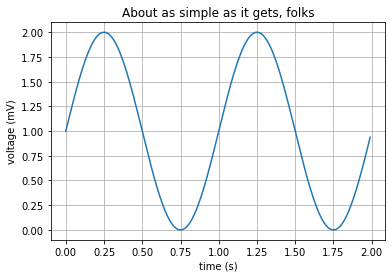

In [ ]:


t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()